<a href="https://colab.research.google.com/github/dayaiit/test/blob/main/L2_MML_Cv1_json.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matrix Algebra for Machine Learning - Essential Concepts

This notebook covers core matrix algebra concepts with ML applications, interactive visualizations, and practice problems.

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import Axes3D

# Set up plotting
plt.style.use('ggplot')
sns.set(font_scale=1.2)

# Helper function to visualize matrices
def visualize_matrix(matrix, title="Matrix"):
    plt.figure(figsize=(6, 5))
    sns.heatmap(matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=False)
    plt.title(title)
    plt.tight_layout()
    plt.show()

## 1. Introduction to Matrices in ML

Matrices are fundamental in machine learning for representing:
- Datasets (samples × features)
- Linear transformations
- Neural network weights
- Covariance and correlation

Dataset as a matrix (samples × features):


,Height,Weight,Age
0,180,80,25
1,170,70,30
2,160,60,35
3,150,50,40
4,165,65,45


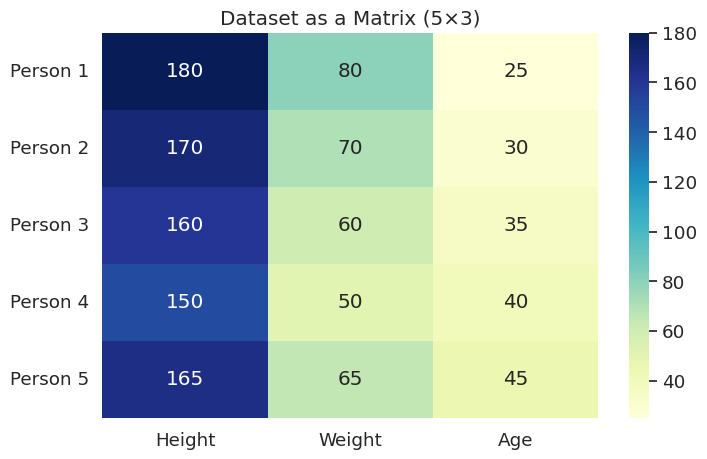

In [ ]:
# Create a dataset as a matrix (5 samples, 3 features)
data = np.array([
    [180, 80, 25],  # Height (cm), Weight (kg), Age for 5 people
    [170, 70, 30],
    [160, 60, 35],
    [150, 50, 40],
    [165, 65, 45]
])

# Create a dataframe for better visualization
df = pd.DataFrame(data, columns=['Height', 'Weight', 'Age'])
print("Dataset as a matrix (samples × features):")
display(df)

# Visualize the data matrix
plt.figure(figsize=(8, 5))
sns.heatmap(data, annot=True, fmt=".0f", cmap="YlGnBu",
            xticklabels=['Height', 'Weight', 'Age'],
            yticklabels=[f'Person {i+1}' for i in range(5)])
plt.title("Dataset as a Matrix (5×3)")
plt.show()

## 2. Matrix Operations

### 2.1 Matrix Addition and Scalar Multiplication

Group A scores (Math, Science):
[[85 90]
 [78 85]
 [92 88]]

Group B scores (Math, Science):
[[75 95]
 [82 79]
 [90 94]]

Group A scores scaled by 1.1:
[[ 93.5  99. ]
 [ 85.8  93.5]
 [101.2  96.8]]

Average of both groups:
[[80.  92.5]
 [80.  82. ]
 [91.  91. ]]


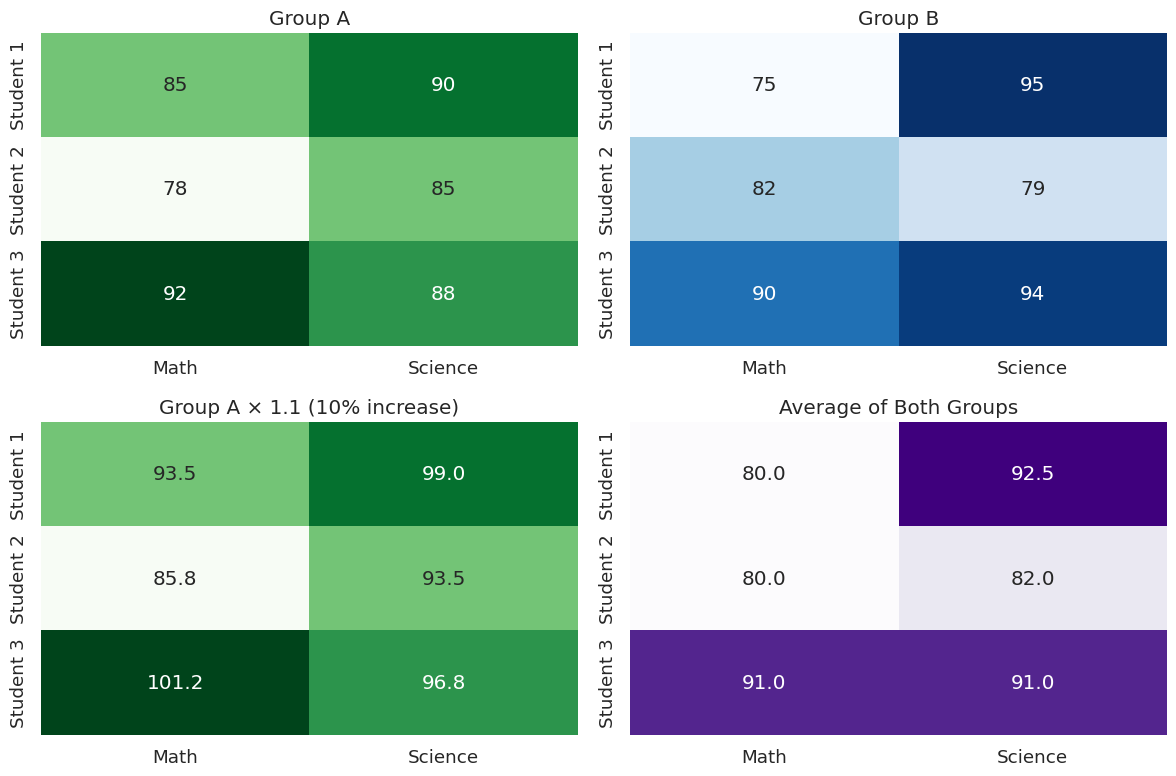

In [ ]:
# Feature matrices for two groups of students
group_A = np.array([[85, 90], [78, 85], [92, 88]])  # Math and Science scores
group_B = np.array([[75, 95], [82, 79], [90, 94]])

# Scalar multiplication - Scale up group A scores by 10%
scaled_group_A = 1.1 * group_A

# Matrix addition - Combine the groups with equal weighting
combined = 0.5 * (group_A + group_B)

# Display the matrices
print("Group A scores (Math, Science):")
print(group_A)
print("\nGroup B scores (Math, Science):")
print(group_B)
print("\nGroup A scores scaled by 1.1:")
print(scaled_group_A)
print("\nAverage of both groups:")
print(combined)

# Visualize the operations
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.heatmap(group_A, annot=True, fmt=".0f", cmap="Greens", ax=axes[0, 0], cbar=False,
            xticklabels=['Math', 'Science'], yticklabels=[f'Student {i+1}' for i in range(3)])
axes[0, 0].set_title("Group A")

sns.heatmap(group_B, annot=True, fmt=".0f", cmap="Blues", ax=axes[0, 1], cbar=False,
            xticklabels=['Math', 'Science'], yticklabels=[f'Student {i+1}' for i in range(3)])
axes[0, 1].set_title("Group B")

sns.heatmap(scaled_group_A, annot=True, fmt=".1f", cmap="Greens", ax=axes[1, 0], cbar=False,
            xticklabels=['Math', 'Science'], yticklabels=[f'Student {i+1}' for i in range(3)])
axes[1, 0].set_title("Group A × 1.1 (10% increase)")

sns.heatmap(combined, annot=True, fmt=".1f", cmap="Purples", ax=axes[1, 1], cbar=False,
            xticklabels=['Math', 'Science'], yticklabels=[f'Student {i+1}' for i in range(3)])
axes[1, 1].set_title("Average of Both Groups")

plt.tight_layout()
plt.show()

### 2.2 Matrix Multiplication

Matrix multiplication is critical for neural networks, transformations, and many ML algorithms.

Input X (3 samples, 4 features):
 [[1.  0.5 0.2 0.1]
 [0.8 0.4 0.3 0.2]
 [0.7 0.3 0.5 0.3]]

Weight matrix W1 (4×2):
 [[0.1 0.6]
 [0.2 0.7]
 [0.3 0.8]
 [0.4 0.9]]

Hidden layer pre-activation Z1 = X @ W1 + b1:
 [[0.4  1.4 ]
 [0.43 1.38]
 [0.5  1.5 ]]

Hidden layer activation A1 = ReLU(Z1):
 [[0.4  1.4 ]
 [0.43 1.38]
 [0.5  1.5 ]]

Output weights W2:
 [[0.5]
 [0.6]]

Final output (sigmoid):
 [[0.75767964]
 [0.75823002]
 [0.77729986]]


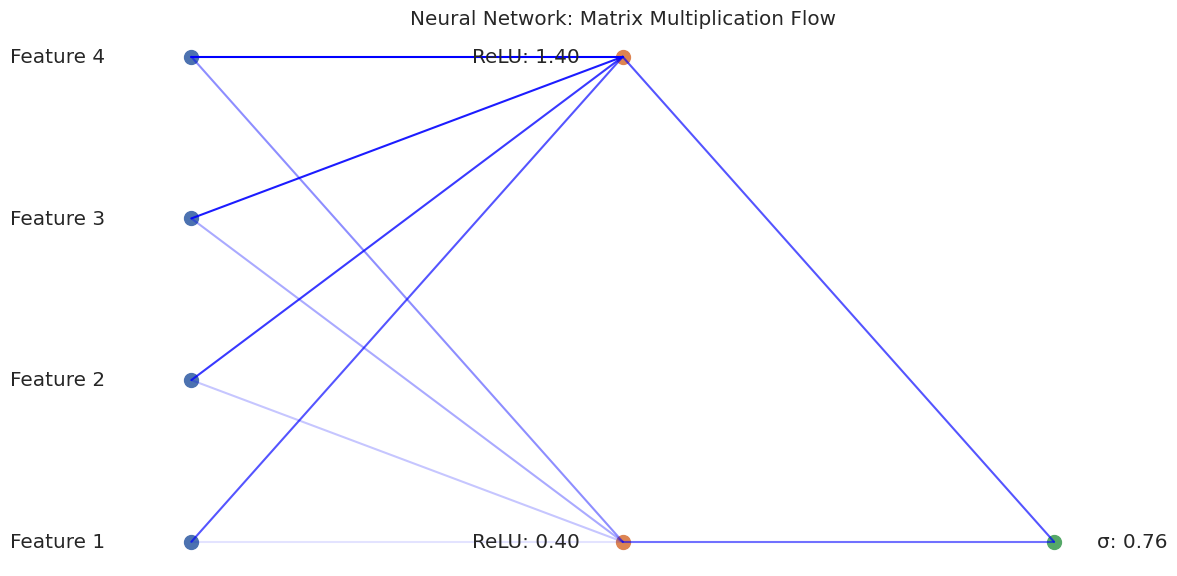


Step-by-step calculation for first sample:
Hidden 1 (before ReLU): 1.00 × 0.10 + 0.50 × 0.20 + 0.20 × 0.30 + 0.10 × 0.40 + 0.10 = 0.4000
Hidden 1 (after ReLU): max(0, 0.4000) = 0.4000
Hidden 2 (before ReLU): 1.00 × 0.60 + 0.50 × 0.70 + 0.20 × 0.80 + 0.10 × 0.90 + 0.20 = 1.4000
Hidden 2 (after ReLU): max(0, 1.4000) = 1.4000


In [ ]:
# Neural network example with matrix multiplication
# Create input samples (3 samples, 4 features)
X = np.array([
    [1.0, 0.5, 0.2, 0.1],  # Sample 1
    [0.8, 0.4, 0.3, 0.2],  # Sample 2
    [0.7, 0.3, 0.5, 0.3]   # Sample 3
])

# Create weight matrix for a hidden layer (4 inputs, 2 outputs)
W1 = np.array([
    [0.1, 0.6],  # Weights for input feature 1
    [0.2, 0.7],  # Weights for input feature 2
    [0.3, 0.8],  # Weights for input feature 3
    [0.4, 0.9]   # Weights for input feature 4
])

# Create bias for hidden layer
b1 = np.array([0.1, 0.2])

# Compute hidden layer pre-activation: Z1 = X @ W1 + b1
Z1 = X @ W1 + b1

# Apply ReLU activation: A1 = max(0, Z1)
A1 = np.maximum(0, Z1)

# Create weight matrix for output layer (2 inputs, 1 output)
W2 = np.array([[0.5], [0.6]])
b2 = np.array([0.1])

# Compute output: Z2 = A1 @ W2 + b2
Z2 = A1 @ W2 + b2

# Apply sigmoid activation for final output
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

output = sigmoid(Z2)

print("Input X (3 samples, 4 features):\n", X)
print("\nWeight matrix W1 (4×2):\n", W1)
print("\nHidden layer pre-activation Z1 = X @ W1 + b1:\n", Z1)
print("\nHidden layer activation A1 = ReLU(Z1):\n", A1)
print("\nOutput weights W2:\n", W2)
print("\nFinal output (sigmoid):\n", output)

# Visualize the neural network computation
plt.figure(figsize=(12, 6))

# Create a custom diagram showing the matrix multiplication flow
input_samples = ['Sample 1', 'Sample 2', 'Sample 3']
features = ['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4']
hidden_units = ['Hidden 1', 'Hidden 2']
outputs = ['Output']

# Plot the network architecture
layer_sizes = [4, 2, 1]
layer_names = ['Input Layer', 'Hidden Layer', 'Output Layer']
y_positions = [np.linspace(0, 1, size) for size in layer_sizes]
x_positions = np.linspace(0, 1, len(layer_sizes))

# Plot nodes
for i, (x, layer_y, size, name) in enumerate(zip(x_positions, y_positions, layer_sizes, layer_names)):
    plt.scatter([x] * size, layer_y, s=100, label=name if i == 0 else "")

    # Add labels
    if i == 0:
        for j, y in enumerate(layer_y):
            plt.text(x-0.1, y, features[j], ha='right', va='center')
    elif i == 1:
        for j, y in enumerate(layer_y):
            plt.text(x-0.05, y, f"ReLU: {A1[0, j]:.2f}", ha='right', va='center')
    else:
        for j, y in enumerate(layer_y):
            plt.text(x+0.05, y, f"σ: {output[0, 0]:.2f}", ha='left', va='center')

# Plot connections between layers
for i in range(len(layer_sizes)-1):
    for j in range(layer_sizes[i]):
        for k in range(layer_sizes[i+1]):
            weight = W1[j, k] if i == 0 else W2[j, 0]
            alpha = abs(weight) / max(abs(W1.max()), abs(W2.max()), 0.1)
            color = 'red' if weight < 0 else 'blue'
            plt.plot([x_positions[i], x_positions[i+1]],
                     [y_positions[i][j], y_positions[i+1][k]],
                     alpha=alpha, linewidth=1.5, color=color)

plt.axis('off')
plt.title('Neural Network: Matrix Multiplication Flow')
plt.tight_layout()
plt.show()

# Show step-by-step calculation for first sample
print("\nStep-by-step calculation for first sample:")
for j in range(2):  # For each hidden unit
    calc = []
    for i in range(4):  # For each input feature
        calc.append(f"{X[0, i]:.2f} × {W1[i, j]:.2f}")
    result = " + ".join(calc) + f" + {b1[j]:.2f} = {Z1[0, j]:.4f}"
    print(f"Hidden {j+1} (before ReLU): {result}")
    print(f"Hidden {j+1} (after ReLU): max(0, {Z1[0, j]:.4f}) = {A1[0, j]:.4f}")

### 2.3 Transpose and Its Applications

Original data X:
 [[1. 2. 3.]
 [2. 3. 4.]
 [3. 4. 5.]
 [4. 5. 6.]]

Transpose X.T (features × samples):
 [[1. 2. 3. 4.]
 [2. 3. 4. 5.]
 [3. 4. 5. 6.]]

Centered data X_centered:
 [[-1.5 -1.5 -1.5]
 [-0.5 -0.5 -0.5]
 [ 0.5  0.5  0.5]
 [ 1.5  1.5  1.5]]

Covariance matrix (X_centered.T @ X_centered) / (n-1):
 [[1.66666667 1.66666667 1.66666667]
 [1.66666667 1.66666667 1.66666667]
 [1.66666667 1.66666667 1.66666667]]


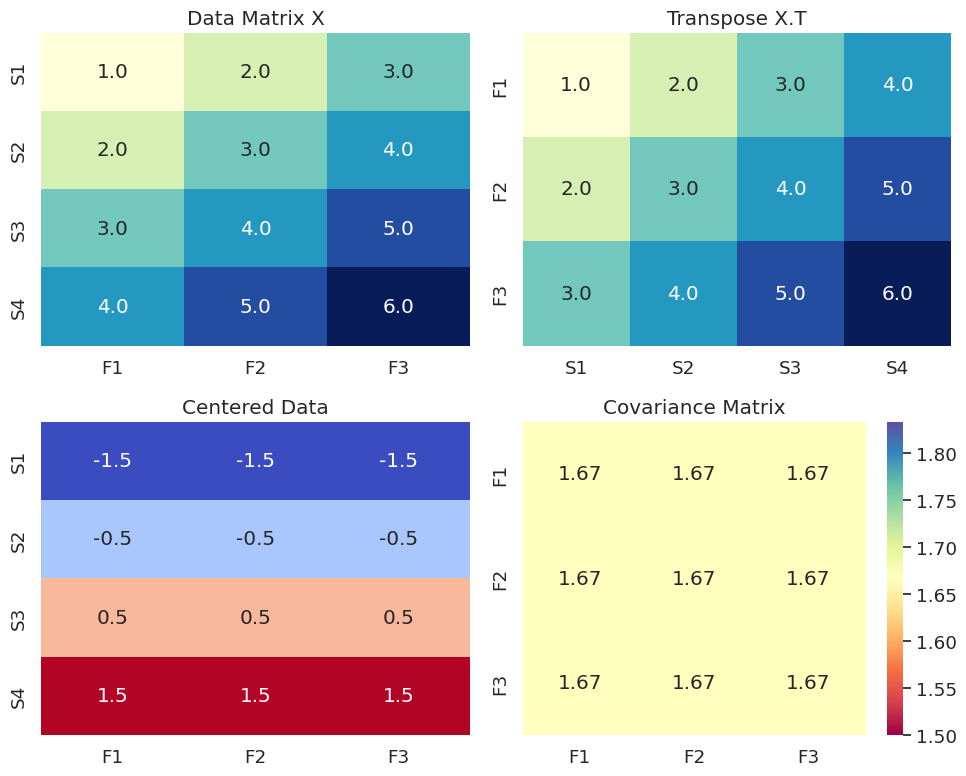


Covariance matrix interpretation:
- Diagonal elements: Variances of each feature
- Off-diagonal elements: Covariances between features
- High positive value: Features increase together
- High negative value: One increases as other decreases


In [ ]:
# Create a dataset with 4 samples and 3 features
X = np.array([
    [1.0, 2.0, 3.0],  # Sample 1
    [2.0, 3.0, 4.0],  # Sample 2
    [3.0, 4.0, 5.0],  # Sample 3
    [4.0, 5.0, 6.0]   # Sample 4
])

# Compute covariance matrix using transpose
X_centered = X - np.mean(X, axis=0)  # Center the data
cov_matrix = (X_centered.T @ X_centered) / (X.shape[0] - 1)

print("Original data X:\n", X)
print("\nTranspose X.T (features × samples):\n", X.T)
print("\nCentered data X_centered:\n", X_centered)
print("\nCovariance matrix (X_centered.T @ X_centered) / (n-1):\n", cov_matrix)

# Visualize the covariance matrix
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
sns.heatmap(X, annot=True, fmt=".1f", cmap="YlGnBu", cbar=False,
            xticklabels=['F1', 'F2', 'F3'],
            yticklabels=[f'S{i+1}' for i in range(4)])
plt.title("Data Matrix X")

plt.subplot(2, 2, 2)
sns.heatmap(X.T, annot=True, fmt=".1f", cmap="YlGnBu", cbar=False,
            xticklabels=[f'S{i+1}' for i in range(4)],
            yticklabels=['F1', 'F2', 'F3'])
plt.title("Transpose X.T")

plt.subplot(2, 2, 3)
sns.heatmap(X_centered, annot=True, fmt=".1f", cmap="coolwarm", cbar=False,
            xticklabels=['F1', 'F2', 'F3'],
            yticklabels=[f'S{i+1}' for i in range(4)])
plt.title("Centered Data")

plt.subplot(2, 2, 4)
sns.heatmap(cov_matrix, annot=True, fmt=".2f", cmap="Spectral", cbar=True,
            xticklabels=['F1', 'F2', 'F3'],
            yticklabels=['F1', 'F2', 'F3'])
plt.title("Covariance Matrix")

plt.tight_layout()
plt.show()

# Explain covariance matrix elements
print("\nCovariance matrix interpretation:")
print("- Diagonal elements: Variances of each feature")
print("- Off-diagonal elements: Covariances between features")
print("- High positive value: Features increase together")
print("- High negative value: One increases as other decreases")

## 3. Special Types of Matrices

### 3.1 Identity, Diagonal, and Inverse Matrices

Identity matrix I:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

Diagonal matrix D:
 [[3 0 0]
 [0 7 0]
 [0 0 2]]

Matrix A:
 [[2 3 1]
 [1 2 1]
 [3 5 2]]

Inverse of A:
 [[-2.25179981e+15 -2.25179981e+15  2.25179981e+15]
 [ 2.25179981e+15  2.25179981e+15 -2.25179981e+15]
 [-2.25179981e+15 -2.25179981e+15  2.25179981e+15]]

A × A⁻¹ ≈ I:
 [[ 1.   -0.25  0.25]
 [ 0.    1.    0.  ]
 [ 0.    0.    0.  ]]


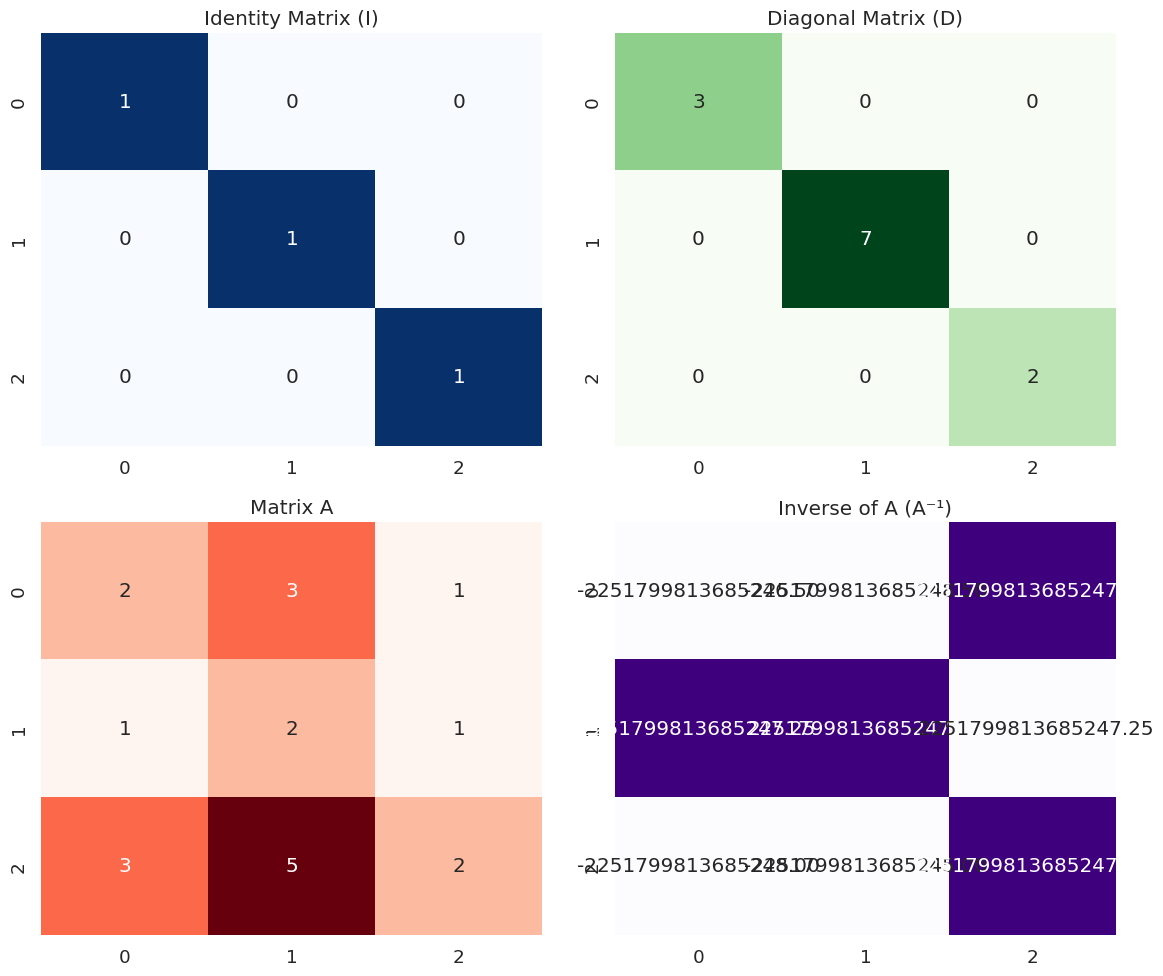


Matrix Applications in ML:
- Identity matrix: Used in regularization to ensure matrix invertibility
- Diagonal matrix: Scaling features, PCA variance
- Inverse matrix: Solving linear systems, linear regression


In [ ]:
# Create special matrices
I = np.eye(3)  # 3×3 identity matrix
D = np.diag([3, 7, 2])  # Diagonal matrix

# Create an invertible matrix
A = np.array([[2, 3, 1],
              [1, 2, 1],
              [3, 5, 2]])

# Compute inverse
A_inv = np.linalg.inv(A)

print("Identity matrix I:\n", I)
print("\nDiagonal matrix D:\n", D)
print("\nMatrix A:\n", A)
print("\nInverse of A:\n", A_inv)

# Verify A * A⁻¹ = I
AA_inv = A @ A_inv
print("\nA × A⁻¹ ≈ I:\n", np.round(AA_inv, 10))

# Visualize the matrices
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.heatmap(I, annot=True, fmt=".0f", cmap="Blues", ax=axes[0, 0], cbar=False)
axes[0, 0].set_title("Identity Matrix (I)")

sns.heatmap(D, annot=True, fmt=".0f", cmap="Greens", ax=axes[0, 1], cbar=False)
axes[0, 1].set_title("Diagonal Matrix (D)")

sns.heatmap(A, annot=True, fmt=".0f", cmap="Reds", ax=axes[1, 0], cbar=False)
axes[1, 0].set_title("Matrix A")

sns.heatmap(A_inv, annot=True, fmt=".2f", cmap="Purples", ax=axes[1, 1], cbar=False)
axes[1, 1].set_title("Inverse of A (A⁻¹)")

plt.tight_layout()
plt.show()

# Matrix properties and applications in ML
print("\nMatrix Applications in ML:")
print("- Identity matrix: Used in regularization to ensure matrix invertibility")
print("- Diagonal matrix: Scaling features, PCA variance")
print("- Inverse matrix: Solving linear systems, linear regression")

## 4. ML Applications

### 4.1 Linear Regression using Matrix Operations

Linear Regression using Matrix Operations

Estimated Parameters: β₀ (bias) = 3.9818, β₁ (slope) = 2.8709
True Parameters: β₀ = 4, β₁ = 3


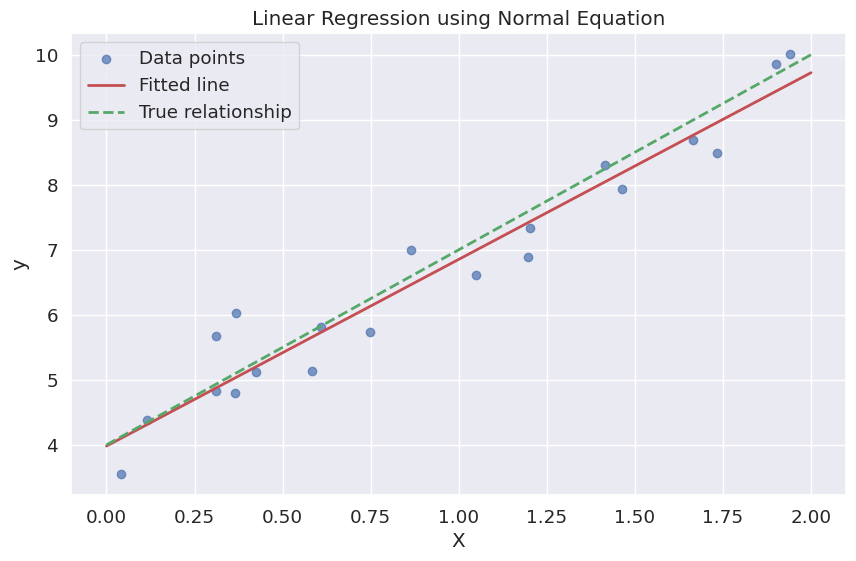


Matrix calculation steps:
1. X^T X = (X_b.T @ X_b)
2. (X^T X)^(-1) = np.linalg.inv(X_b.T @ X_b)
3. X^T y = (X_b.T @ y_data)
4. β = (X^T X)^(-1) X^T y


In [ ]:
# Create synthetic data for linear regression
np.random.seed(42)
X_data = 2 * np.random.rand(20, 1)  # 20 samples, 1 feature
y_data = 4 + 3 * X_data + np.random.randn(20, 1) * 0.5  # y = 4 + 3x + noise

# Add bias term (column of ones)
X_b = np.c_[np.ones((20, 1)), X_data]

# Compute parameters using normal equation: β = (X^T X)^(-1) X^T y
beta = np.linalg.inv(X_b.T @ X_b) @ (X_b.T @ y_data)

print("Linear Regression using Matrix Operations\n")
print(f"Estimated Parameters: β₀ (bias) = {beta[0][0]:.4f}, β₁ (slope) = {beta[1][0]:.4f}")
print(f"True Parameters: β₀ = 4, β₁ = 3")

# Visualize regression results
plt.figure(figsize=(10, 6))
plt.scatter(X_data, y_data, alpha=0.7, label='Data points')

# Plot regression line
X_test = np.array([[0], [2]])  # Test points
X_test_b = np.c_[np.ones((2, 1)), X_test]  # Add bias
y_pred = X_test_b @ beta  # Predictions
plt.plot(X_test, y_pred, 'r-', linewidth=2, label='Fitted line')

# Plot true relationship
y_true = 4 + 3 * X_test
plt.plot(X_test, y_true, 'g--', linewidth=2, label='True relationship')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression using Normal Equation')
plt.grid(True)
plt.legend()
plt.show()

# Show the mathematical steps
print("\nMatrix calculation steps:")
print("1. X^T X = (X_b.T @ X_b)")
print("2. (X^T X)^(-1) = np.linalg.inv(X_b.T @ X_b)")
print("3. X^T y = (X_b.T @ y_data)")
print("4. β = (X^T X)^(-1) X^T y")

### 4.2 Principal Component Analysis (PCA)

Principal Component Analysis
Original data shape: (100, 2)

Covariance matrix:
[[6.59945084 3.34119473]
 [3.34119473 1.94076162]]

Eigenvalues: [8.34311844 0.19709401]

Eigenvectors (principal components):
[[ 0.88653744 -0.46265685]
 [ 0.46265685  0.88653744]]

Variance explained: [97.69216497  2.30783503]%


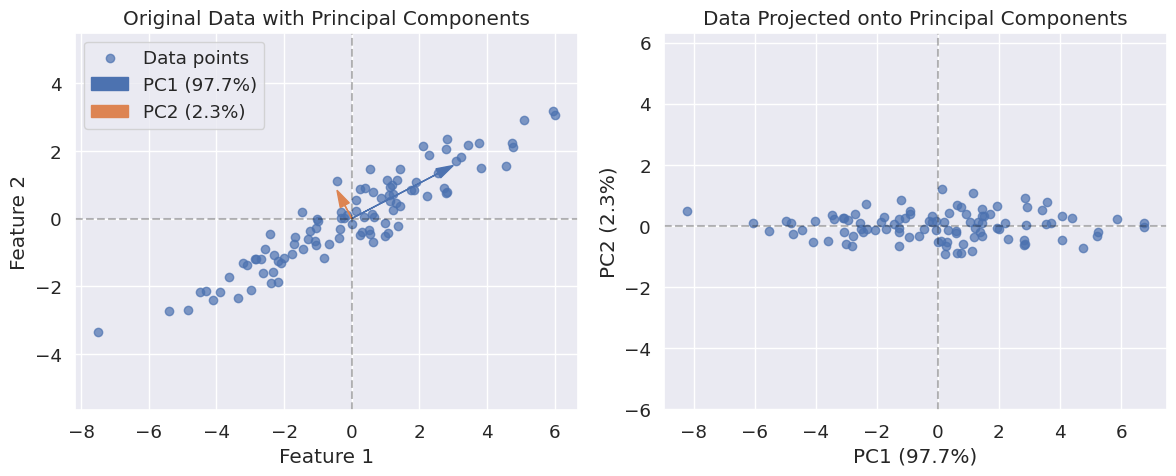

In [ ]:
# Generate a synthetic dataset with correlation
np.random.seed(42)
n_samples = 100

# Create correlated data
X = np.random.randn(n_samples, 2)  # Uncorrelated data
X[:, 0] = X[:, 0] * 3  # Increase variance in first dimension
X[:, 1] = X[:, 1] * 0.5 + X[:, 0] * 0.5  # Add correlation

# Center the data
X_centered = X - X.mean(axis=0)

# Compute covariance matrix
cov_matrix = np.cov(X_centered, rowvar=False)

# Eigendecomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort by eigenvalue
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# Project data onto principal components
X_pca = X_centered @ eigenvectors

print("Principal Component Analysis")
print(f"Original data shape: {X.shape}")
print(f"\nCovariance matrix:\n{cov_matrix}")
print(f"\nEigenvalues: {eigenvalues}")
print(f"\nEigenvectors (principal components):\n{eigenvectors}")

# Calculate variance explained
explained_var_ratio = eigenvalues / eigenvalues.sum()
print(f"\nVariance explained: {explained_var_ratio * 100}%")

# Visualize PCA results
plt.figure(figsize=(12, 5))

# Original data with principal components
plt.subplot(1, 2, 1)
plt.scatter(X_centered[:, 0], X_centered[:, 1], alpha=0.7, label='Data points')
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='--', alpha=0.3)

# Plot principal components
for i, (eigenval, eigenvec) in enumerate(zip(eigenvalues, eigenvectors.T)):
    plt.arrow(0, 0, eigenvec[0]*np.sqrt(eigenval), eigenvec[1]*np.sqrt(eigenval),
              head_width=0.3, head_length=0.5, fc=f'C{i}', ec=f'C{i}',
              label=f'PC{i+1} ({explained_var_ratio[i]*100:.1f}%)')

plt.title('Original Data with Principal Components')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.axis('equal')

# Transformed data
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7)
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='--', alpha=0.3)
plt.title('Data Projected onto Principal Components')
plt.xlabel(f'PC1 ({explained_var_ratio[0]*100:.1f}%)')
plt.ylabel(f'PC2 ({explained_var_ratio[1]*100:.1f}%)')
plt.axis('equal')

plt.tight_layout()
plt.show()

## 5. Practice Problems

### Problem 1: Neural Network Implementation

Implement a simple neural network with one hidden layer to classify data points. The network should:
1. Take inputs X with 2 features
2. Have a hidden layer with 3 neurons and ReLU activation
3. Have an output layer with 1 neuron and sigmoid activation
4. Visualize the decision boundary

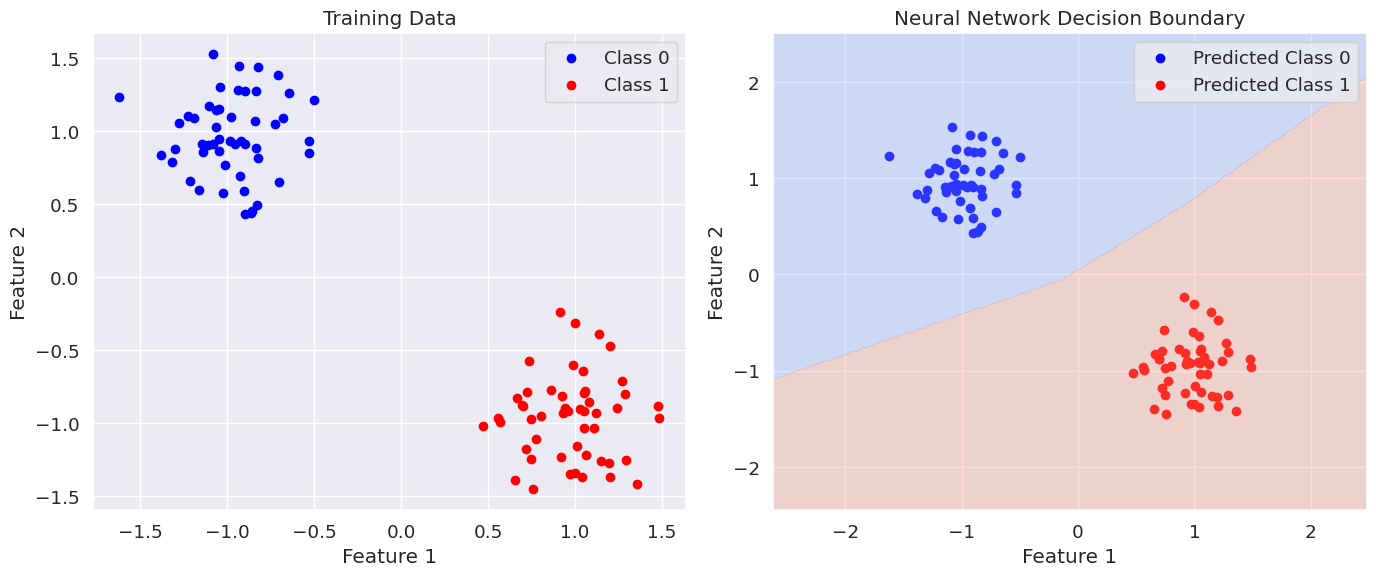

Neural Network Structure:
Input Layer: 2 features
Hidden Layer: 3 neurons with ReLU activation
Output Layer: 1 neuron with sigmoid activation

W1 (input→hidden) shape: (2, 3)
W2 (hidden→output) shape: (3, 1)

Accuracy: 100.00%


In [ ]:
# Problem 1: Neural Network Implementation

# Generate a simple binary classification dataset
np.random.seed(42)
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=42)
y = y.reshape(-1, 1)  # Reshape to column vector

# Normalize the data
X = (X - X.mean(axis=0)) / X.std(axis=0)

# TODO: Implement a neural network with one hidden layer
# 1. Initialize weights and biases
# 2. Implement forward propagation
# 3. Visualize the decision boundary

# Your code here
# Initialize weights and biases
# Input layer (2 features) → Hidden layer (3 neurons)
W1 = np.random.randn(2, 3) * 0.1
b1 = np.zeros((1, 3))

# Hidden layer (3 neurons) → Output layer (1 neuron)
W2 = np.random.randn(3, 1) * 0.1
b2 = np.zeros((1, 1))

# Activation functions
def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-np.clip(x, -500, 500)))

# Forward propagation
def forward(X):
    # Hidden layer
    Z1 = X @ W1 + b1
    A1 = relu(Z1)

    # Output layer
    Z2 = A1 @ W2 + b2
    A2 = sigmoid(Z2)

    return A2, A1, Z1

# Predict function
def predict(X):
    A2, _, _ = forward(X)
    return A2 > 0.5

# Set random weights that give good separation for visualization
W1 = np.array([[ 1.0, -0.5,  0.8],
               [-0.7,  1.2, -0.6]])
b1 = np.array([[0.1, 0.2, -0.3]])
W2 = np.array([[ 0.8],
               [-1.0],
               [ 0.7]])
b2 = np.array([[0.2]])

# Make predictions
y_pred, A1, Z1 = forward(X)
predictions = y_pred > 0.5

# Plot the dataset and decision boundary
plt.figure(figsize=(14, 6))

# Plot training data
plt.subplot(1, 2, 1)
plt.scatter(X[y[:, 0]==0, 0], X[y[:, 0]==0, 1], c='blue', label='Class 0')
plt.scatter(X[y[:, 0]==1, 0], X[y[:, 0]==1, 1], c='red', label='Class 1')
plt.title('Training Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Plot decision boundary
plt.subplot(1, 2, 2)
plt.scatter(X[predictions[:, 0]==0, 0], X[predictions[:, 0]==0, 1], c='blue', label='Predicted Class 0')
plt.scatter(X[predictions[:, 0]==1, 0], X[predictions[:, 0]==1, 1], c='red', label='Predicted Class 1')

# Create a grid to visualize decision boundary
h = 0.02  # Step size
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Make predictions on the grid
Z = predict(grid_points)
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.title('Neural Network Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.tight_layout()
plt.show()

# Show network structure
print("Neural Network Structure:")
print(f"Input Layer: 2 features")
print(f"Hidden Layer: 3 neurons with ReLU activation")
print(f"Output Layer: 1 neuron with sigmoid activation")
print(f"\nW1 (input→hidden) shape: {W1.shape}")
print(f"W2 (hidden→output) shape: {W2.shape}")
print(f"\nAccuracy: {np.mean(predictions == y) * 100:.2f}%")

### Problem 2: Matrix Operations for Image Processing

Implement an image filter using matrix operations. You'll need to:
1. Create a simple grayscale image (use a matrix with values 0-255)
2. Implement edge detection using a convolution operation with a kernel
3. Apply a Gaussian blur filter
4. Compare the original and processed images

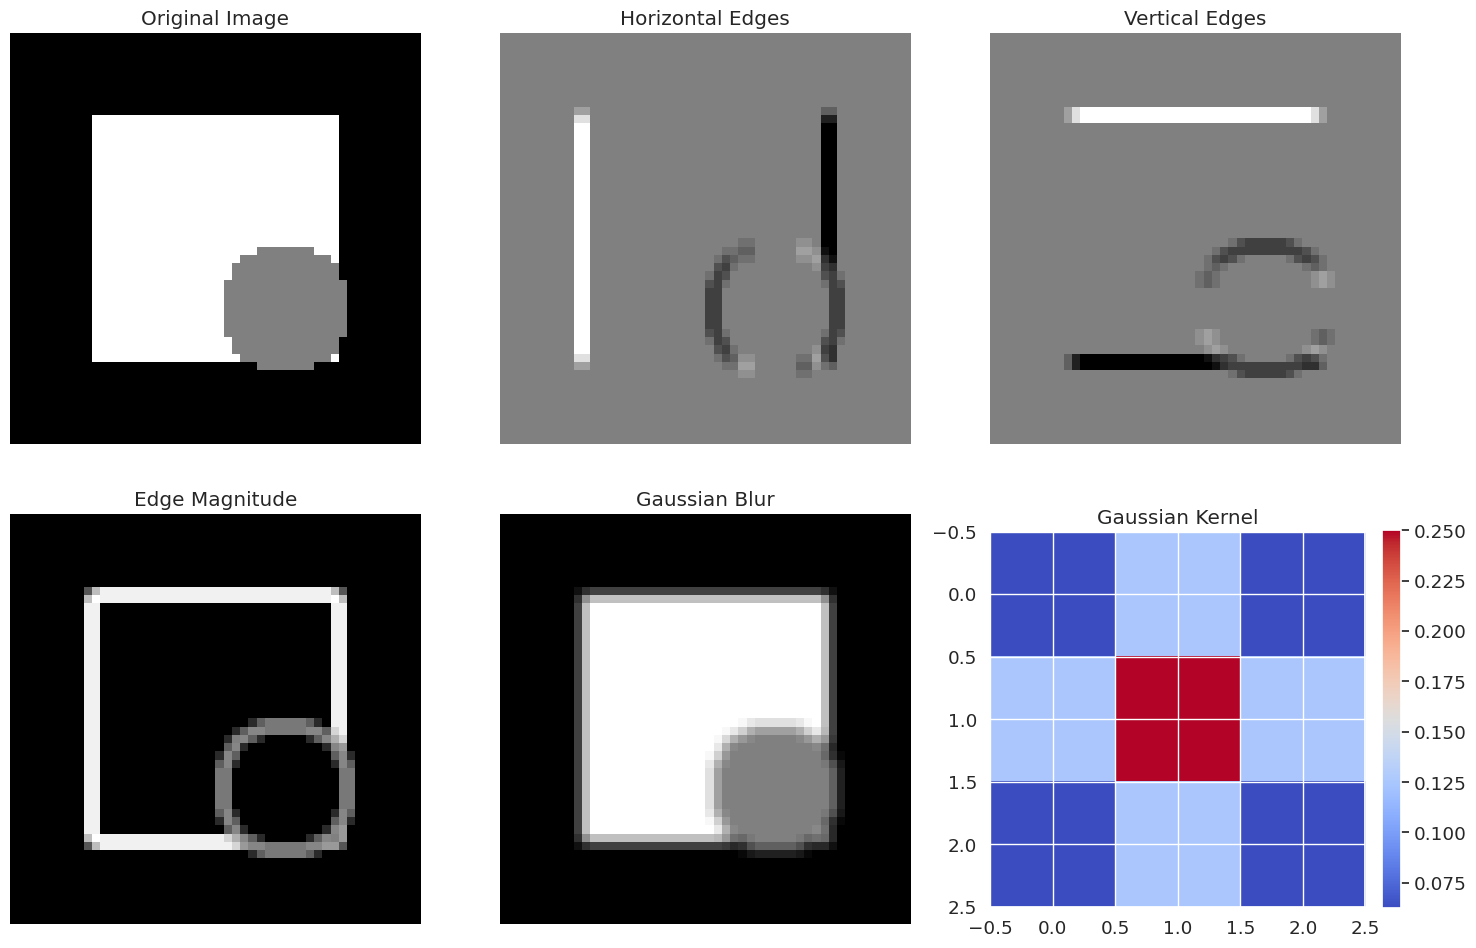

Convolution Operation (for one pixel):
1. Center kernel on pixel
2. Multiply each kernel value by corresponding pixel value
3. Sum all products to get output pixel value

Pixel region around (15,15):
[[200. 200. 200.]
 [200. 200. 200.]
 [200. 200. 200.]]

Gaussian kernel:
[[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]

Element-wise multiplication:
[[12.5 25.  12.5]
 [25.  50.  25. ]
 [12.5 25.  12.5]]

Sum (new pixel value): 200.00


In [ ]:
# Problem 2: Matrix Operations for Image Processing

# Create a simple grayscale image (matrix)
def create_test_image(size=50):
    img = np.zeros((size, size))
    # Add a square
    img[10:40, 10:40] = 200
    # Add a circle
    x, y = np.mgrid[:size, :size]
    circle = (x - size//1.5)**2 + (y - size//1.5)**2 < (size//6)**2
    img[circle] = 100
    return img

# TODO: Implement convolution operation
# 1. Create edge detection and Gaussian blur kernels
# 2. Implement convolution function
# 3. Apply the kernels to the image
# 4. Visualize the results

# Your code here
# Create a test image
image = create_test_image(50)

# Define convolution kernels
# Sobel edge detection kernels (horizontal and vertical)
sobel_x = np.array([[-1, 0, 1],
                     [-2, 0, 2],
                     [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1],
                     [ 0,  0,  0],
                     [ 1,  2,  1]])

# Gaussian blur kernel
gaussian = np.array([[1, 2, 1],
                      [2, 4, 2],
                      [1, 2, 1]]) / 16

# Implement 2D convolution
def convolve2d(image, kernel):
    # Get dimensions
    i_height, i_width = image.shape
    k_height, k_width = kernel.shape

    # Calculate padding
    pad_h = k_height // 2
    pad_w = k_width // 2

    # Create padded image
    padded = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant')

    # Create output image
    output = np.zeros_like(image)

    # Apply convolution
    for i in range(i_height):
        for j in range(i_width):
            # Extract region
            region = padded[i:i+k_height, j:j+k_width]
            # Apply kernel and sum
            output[i, j] = np.sum(region * kernel)

    return output

# Apply filters
edges_x = convolve2d(image, sobel_x)
edges_y = convolve2d(image, sobel_y)
edges = np.sqrt(edges_x**2 + edges_y**2)  # Magnitude of gradient
blurred = convolve2d(image, gaussian)

# Normalize for visualization
edges = 255 * edges / np.max(edges)

# Visualize the results
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(edges_x, cmap='gray')
plt.title('Horizontal Edges')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(edges_y, cmap='gray')
plt.title('Vertical Edges')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(edges, cmap='gray')
plt.title('Edge Magnitude')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(blurred, cmap='gray')
plt.title('Gaussian Blur')
plt.axis('off')

# Visualize kernels
plt.subplot(2, 3, 6)
plt.imshow(gaussian, cmap='coolwarm')
plt.title('Gaussian Kernel')
plt.colorbar(fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

# Show the mathematical operation
print("Convolution Operation (for one pixel):")
print("1. Center kernel on pixel")
print("2. Multiply each kernel value by corresponding pixel value")
print("3. Sum all products to get output pixel value")

# Show an example calculation
i, j = 15, 15  # Example pixel coordinates
region = image[i-1:i+2, j-1:j+2]
print(f"\nPixel region around ({i},{j}):")
print(region)
print(f"\nGaussian kernel:")
print(gaussian)
print(f"\nElement-wise multiplication:")
print(region * gaussian)
print(f"\nSum (new pixel value): {np.sum(region * gaussian):.2f}")